In [279]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [280]:
ds=xr.open_dataset('/glade/u/home/djk2120/ppe_clean/postp/lhc/ccycle.ann.LHC.nc')
f='/glade/campaign/asp/djk2120/PPEn11/csvs/lhc220926.txt'
df=pd.read_csv(f)
params=list(df.columns)
params.remove('member')

In [281]:
la=xr.open_dataset('sparsegrid_landarea.nc').landarea
cf=1e-9*la.sum()*24*60*60*365

In [282]:
sink=cf*(ds.GPP-ds.HR-ds.AR-ds.COL_FIRE_CLOSS)

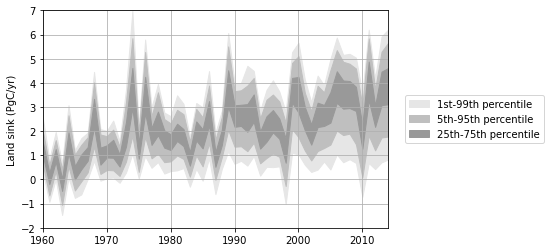

In [307]:
yr0=1960
yr1=2014
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=[8.5,4],gridspec_kw={'width_ratios': [3, 0.75]})
da=sink.sel(ens=range(1,501),biome='global',year=slice(yr0,yr1))

for q,c in zip([0.01,0.05,0.25],[0.9,0.75,0.6]):
    qq=da.quantile([q,1-q],dim='ens')
    q1=int(100*q)
    q2=100-q1
    lab=str(q1)+'th-'+str(q2)+'th percentile'
    if q1==1:
        lab=str(q1)+'st-'+str(q2)+'th percentile'
    ax1.fill_between(range(yr0,yr1+1),qq.isel(quantile=0),qq.isel(quantile=1),color=[c,c,c],label=lab)
    ax2.fill_between(range(yr0,yr1+1),qq.isel(quantile=0),qq.isel(quantile=1),color=[c,c,c],label=lab)
ax1.set_xlim([yr0,yr1])
ax1=set_c
ax1.set_ylim([-2,7])
ax1.set_ylabel('Land sink (PgC/yr)')
ax1.grid()

ax2.set_xlim([0,1])
ax2.axis("off")
ax2.legend(loc=10);

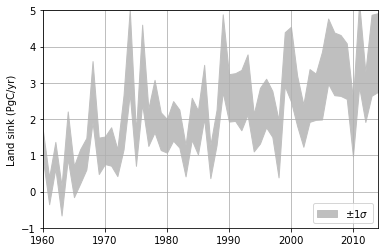

In [306]:
da=sink.sel(ens=range(1,501),biome='global',year=slice(yr0,yr1))
q=0.159
qq=da.quantile([q,1-q],dim='ens')
c=0.75
plt.fill_between(range(yr0,yr1+1),qq.isel(quantile=0),qq.isel(quantile=1),color=[c,c,c],label=r'$\pm$1$\sigma$')
plt.ylim([-1,5])
plt.xlim([yr0,yr1])
plt.legend(loc=4)
plt.ylabel('Land sink (PgC/yr)')
plt.grid()

In [292]:
dim='year'
lai=ds.TLAI.sel(biome='global',year=slice(1985,2014))
p = lai.polyfit(dim=dim, deg=1)
trend=30*p.polyfit_coefficients.sel(degree=1)

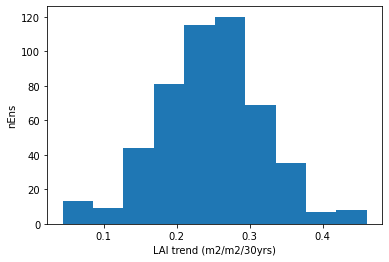

In [294]:
plt.hist(trend)
plt.xlabel('LAI trend (m2/m2/30yrs)')
plt.ylabel('nEns');

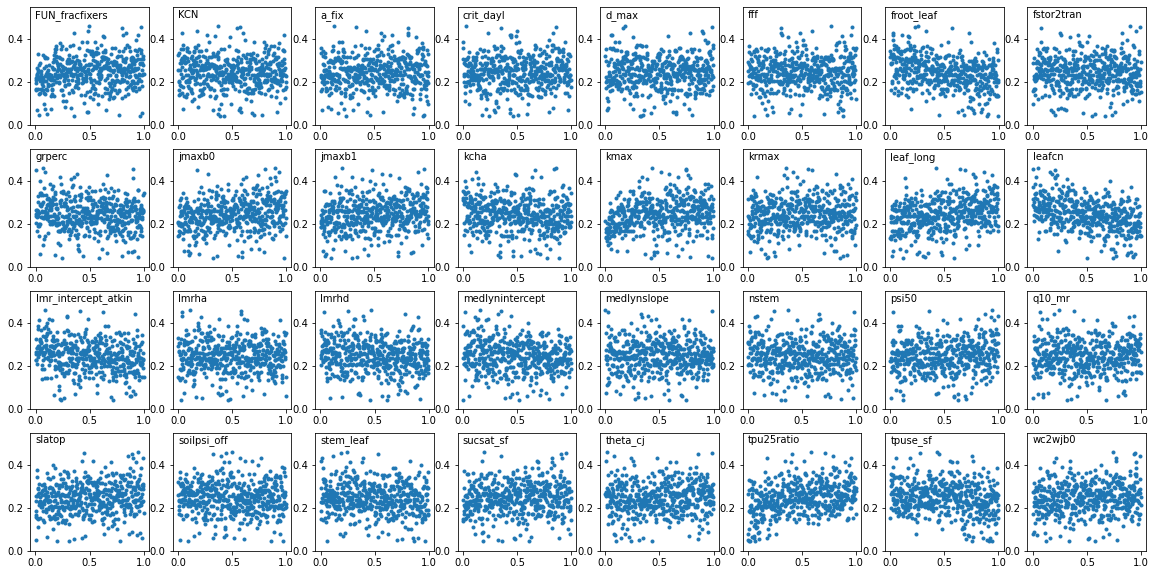

In [296]:

x=trend.sel(ens=range(1,501))
plt.figure(figsize=[20,10])
for i,p in enumerate(params):
    plt.subplot(4,8,i+1)
    plt.plot(df[p],x,'.')
    plt.ylim([0,0.55])
    plt.text(0,0.5,p)